In [25]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [56]:
df = pd.read_csv('data.csv')

In [57]:
df.head()

,Country,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate,WHO Region
0,Afghanistan,2016,677,5,0.7,Eastern Mediterranean
1,Afghanistan,2015,58064,8,0.01,Eastern Mediterranean
2,Afghanistan,2014,45481,4,0.0,Eastern Mediterranean
3,Afghanistan,2013,3957,14,0.35,Eastern Mediterranean
4,Afghanistan,2012,12,0,0.1,Eastern Mediterranean


In [58]:
df.shape

(2492, 6)

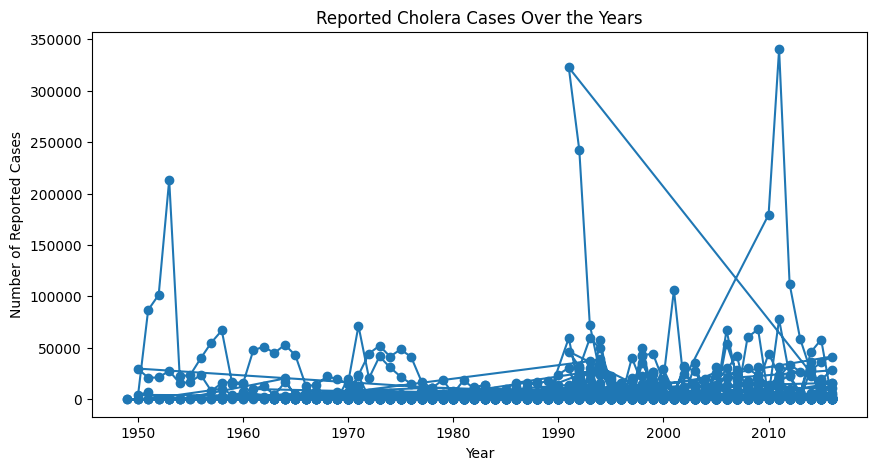

In [59]:
# Convert the column to numeric, coercing errors
df['Number of reported cases of cholera'] = pd.to_numeric(df['Number of reported cases of cholera'], errors='coerce')

# Handle NaN values, for example by filling them with zeros (or any other method you see fit)
df['Number of reported cases of cholera'].fillna(0, inplace=True)

# Retry plotting
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['Number of reported cases of cholera'], marker='o')
plt.title('Reported Cholera Cases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Reported Cases')
plt.show()


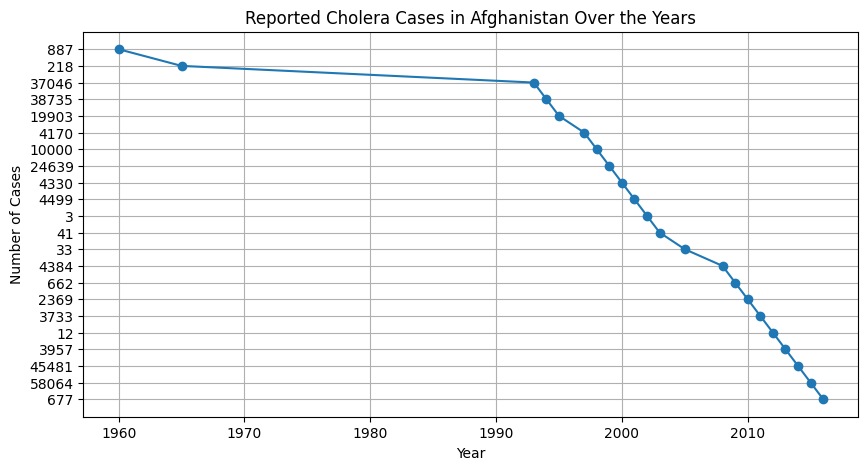

In [6]:
afghanistan_data = df[df['Country'] == 'Afghanistan']
plt.figure(figsize=(10, 5))
plt.plot(afghanistan_data['Year'], afghanistan_data['Number of reported cases of cholera'], marker='o')
plt.title('Reported Cholera Cases in Afghanistan Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()


In [19]:
print(df.isnull().sum())

Country                                     0
Year                                        0
Number of reported cases of cholera        22
Number of reported deaths from cholera    117
Cholera case fatality rate                127
WHO Region                                  0
dtype: int64


In [60]:
# Convert column to float
df['Number of reported cases of cholera'] = pd.to_numeric(df['Number of reported cases of cholera'], errors='coerce')

# Calculate the growth rate
df['Cases Growth Rate'] = df['Number of reported cases of cholera'].pct_change().fillna(0)

In [21]:
# Convert column to float
afghanistan_data['Number of reported cases of cholera'] = pd.to_numeric(afghanistan_data['Number of reported cases of cholera'], errors='coerce')

# Calculate the growth rate
afghanistan_data['Cases Growth Rate'] = afghanistan_data['Number of reported cases of cholera'].pct_change().fillna(0)

/var/folders/7d/j3xl67tj7_182fyw9tbm3rkm0000gn/T/ipykernel_10072/3142546341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afghanistan_data['Number of reported cases of cholera'] = pd.to_numeric(afghanistan_data['Number of reported cases of cholera'], errors='coerce')
/var/folders/7d/j3xl67tj7_182fyw9tbm3rkm0000gn/T/ipykernel_10072/3142546341.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afghanistan_data['Cases Growth Rate'] = afghanistan_data['Number of reported cases of cholera'].pct_change().f

In [61]:
train = df[df['Year'] <= 2014]
test = df[df['Year'] > 2014]

In [23]:
train = afghanistan_data[afghanistan_data['Year'] <= 2014]
test = afghanistan_data[afghanistan_data['Year'] > 2014]

In [62]:
model = LinearRegression()
model.fit(train[['Year']], train['Number of reported cases of cholera'])

# Predictions
test['Predictions'] = model.predict(test[['Year']])

/var/folders/7d/j3xl67tj7_182fyw9tbm3rkm0000gn/T/ipykernel_10072/2659663784.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = model.predict(test[['Year']])


In [26]:
model = LinearRegression()
model.fit(train[['Year']], train['Number of reported cases of cholera'])

# Predictions
test['Predictions'] = model.predict(test[['Year']])

/var/folders/7d/j3xl67tj7_182fyw9tbm3rkm0000gn/T/ipykernel_10072/2659663784.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = model.predict(test[['Year']])


In [63]:
mse = mean_squared_error(test['Number of reported cases of cholera'], test['Predictions'])
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 95892794.42645906


In [27]:
mse = mean_squared_error(test['Number of reported cases of cholera'], test['Predictions'])
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1156163047.221837


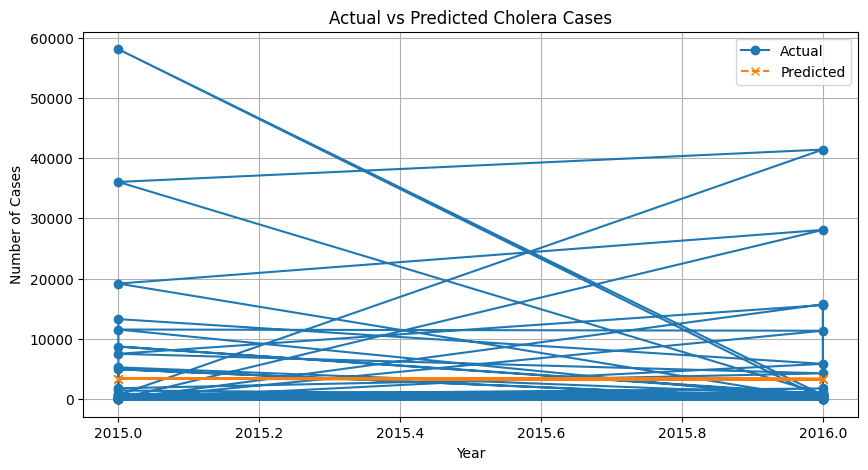

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(test['Year'], test['Number of reported cases of cholera'], marker='o', label='Actual')
plt.plot(test['Year'], test['Predictions'], marker='x', label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Cholera Cases')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()


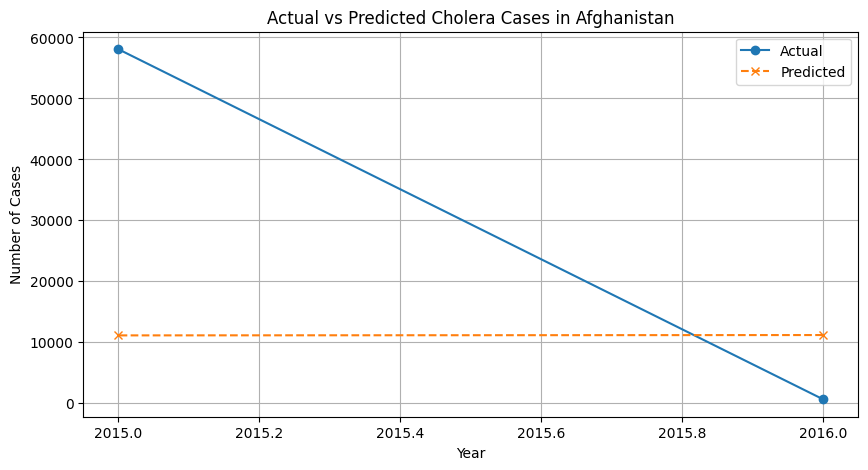

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(test['Year'], test['Number of reported cases of cholera'], marker='o', label='Actual')
plt.plot(test['Year'], test['Predictions'], marker='x', label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Cholera Cases in Afghanistan')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()


In [65]:
# Convert the 'Number of reported cases of cholera' column to numeric
df['Number of reported cases of cholera'] = pd.to_numeric(df['Number of reported cases of cholera'], errors='coerce')

# Check for NaN values after conversion
if df['Number of reported cases of cholera'].isnull().sum() > 0:
    print("There were some values that could not be converted to numeric. Check these values and handle accordingly.")

# After ensuring all values are numeric, you can then attempt the mean calculation again.


In [35]:
# Convert the 'Number of reported cases of cholera' column to numeric
afghanistan_data['Number of reported cases of cholera'] = pd.to_numeric(afghanistan_data['Number of reported cases of cholera'], errors='coerce')

# Check for NaN values after conversion
if afghanistan_data['Number of reported cases of cholera'].isnull().sum() > 0:
    print("There were some values that could not be converted to numeric. Check these values and handle accordingly.")

# After ensuring all values are numeric, you can then attempt the mean calculation again.


/var/folders/7d/j3xl67tj7_182fyw9tbm3rkm0000gn/T/ipykernel_10072/723038210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afghanistan_data['Number of reported cases of cholera'] = pd.to_numeric(afghanistan_data['Number of reported cases of cholera'], errors='coerce')


In [66]:
# Calculate the mean of the dependent variable for Afghanistan
mean_cases = df['Number of reported cases of cholera'].mean()

In [68]:
# Predict this mean for all Afghanistan observations
baseline_predictions = [mean_cases] * len(df)

# Calculate the actual values for Afghanistan
actual_values = df['Number of reported cases of cholera'].values

# Evaluate the Baseline for Afghanistan
from sklearn.metrics import mean_squared_error

baseline_mse = mean_squared_error(actual_values, baseline_predictions)
print(f"Baseline MSE for Afghanistan: {baseline_mse}")

Baseline MSE for Afghanistan: 220143110.83024523


In [38]:

# Predict this mean for all Afghanistan observations
baseline_predictions_afghanistan = [mean_cases_afghanistan] * len(afghanistan_data)

# Calculate the actual values for Afghanistan
actual_values_afghanistan = afghanistan_data['Number of reported cases of cholera'].values

# Evaluate the Baseline for Afghanistan
from sklearn.metrics import mean_squared_error

baseline_mse_afghanistan = mean_squared_error(actual_values_afghanistan, baseline_predictions_afghanistan)
print(f"Baseline MSE for Afghanistan: {baseline_mse_afghanistan}")


Baseline MSE for Afghanistan: 289284988.7541323


In [90]:
df = pd.read_csv('symptoms.csv', sep='\t', header=None, names=['Disease', 'Symptom'], index_col=0)
df.head()

,Symptom
Disease,
"hypertensive disease,pain chest",NaN
"hypertensive disease,shortness of breath",NaN
"hypertensive disease,dizziness",NaN
"hypertensive disease,asthenia",NaN
"hypertensive disease,fall",NaN


In [91]:

# Split the index and create two new columns
df['Disease'], df['Symptom'] = zip(*df.index.str.split(','))

# Reset the index
df.reset_index(drop=True, inplace=True)

# Reorder columns
df = df[['Disease', 'Symptom']]

print(df)


                   Disease              Symptom
0     hypertensive disease           pain chest
1     hypertensive disease  shortness of breath
2     hypertensive disease            dizziness
3     hypertensive disease             asthenia
4     hypertensive disease                 fall
...                    ...                  ...
1861         affect labile  bedridden bedridden
1862         affect labile           prostatism
1863       decubitus ulcer      systolic murmur
1864       decubitus ulcer                frail
1865       decubitus ulcer                fever

[1866 rows x 2 columns]


In [94]:
df = df.drop_duplicates(subset=['Disease', 'Symptom'])

In [97]:
df.shape

(1831, 2)

In [100]:
df.head()

,Disease,Symptom
0,hypertensive disease,pain chest
1,hypertensive disease,shortness of breath
2,hypertensive disease,dizziness
3,hypertensive disease,asthenia
4,hypertensive disease,fall


In [103]:

# Data Snapshot:
print("===== Data Snapshot =====")
print("\nFirst 5 rows of the dataset:\n", df.head())
print("\nShape of the dataset:", df.shape)
print("\nColumn names:", df.columns)

# Data Distribution:
print("\n===== Data Distribution =====")
unique_diseases = df['Disease'].unique()
print("\nNumber of unique diseases:", len(unique_diseases))
print("\nData points for each disease:\n", df['Disease'].value_counts())

# Data Quality:
print("\n===== Data Quality =====")
print("\nMissing values in each column:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe())


===== Data Snapshot =====

First 5 rows of the dataset:
                 Disease              Symptom
0  hypertensive disease           pain chest
1  hypertensive disease  shortness of breath
2  hypertensive disease            dizziness
3  hypertensive disease             asthenia
4  hypertensive disease                 fall

Shape of the dataset: (1831, 2)

Column names: Index(['Disease', 'Symptom'], dtype='object')

===== Data Distribution =====

Number of unique diseases: 133

Data points for each disease:
 Disease
bipolar disorder               28
upper respiratory infection    28
psychotic disorder             25
spasm bronchial                25
anxiety state                  24
                               ..
failure heart congestive        7
kidney disease                  6
decubitus ulcer                 3
coronary arteriosclerosis       1
depression mental               1
Name: count, Length: 133, dtype: int64

===== Data Quality =====

Missing values in each column:
 Dise

In [105]:
import pandas as pd

data = {
    "Disease": [
        "Cholera", "Typhoid", "Hepatitis A", "Dysentery", "Giardiasis",
        "Cryptosporidiosis", "Dracunculiasis", "Leptospirosis", "Schistosomiasis",
        "Amoebiasis", "Ascariasis", "Campylobacteriosis", "E. coli Infection",
        "Polio", "Rotavirus"
    ],
    "Symptom": [
        "Severe diarrhea, vomiting, dehydration",
        "Fever, headache, abdominal pain, constipation or diarrhea, rose-colored spots on the chest",
        "Fever, fatigue, nausea, abdominal pain, dark urine",
        "Bloody diarrhea, abdominal cramps, fever",
        "Diarrhea, gas, bloating, nausea, upset stomach",
        "Watery diarrhea, dehydration, stomach cramps",
        "Skin pain, rashes, blisters, fever, nausea",
        "High fever, headache, chills, muscle aches, vomiting, jaundice, red eyes",
        "Abdominal pain, diarrhea, bloody stool, blood in urine, cough",
        "Loose stools, stomach pain, fever, vomiting",
        "Abdominal pain, diarrhea, cough, wheezing",
        "Diarrhea, stomach cramps, fever, nausea",
        "Diarrhea, stomach cramps, nausea, vomiting",
        "Fever, fatigue, headache, vomiting, stiffness, paralysis",
        "Severe watery diarrhea, vomiting, fever, abdominal pain"
    ]
}

df = pd.DataFrame(data)

# Save to CSV
df.to_csv("expanded_waterborne_diseases.csv", index=False)
